In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Dataset/Train",target_size=(256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Dataset/Val",target_size=(256,256),batch_size=32)
t_img,label = train.next()

Found 7791 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [ ]:
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

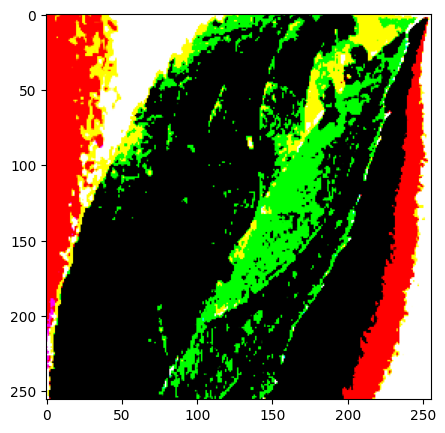

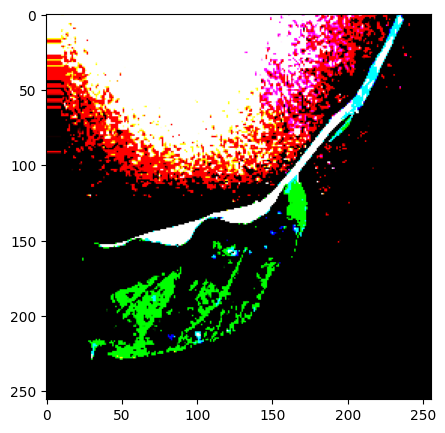

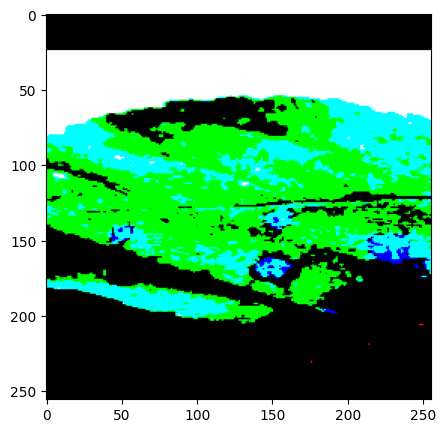

In [ ]:
plotImage(t_img[:3],label[:3])

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3),include_top=False)
for layer in base_model.layers:
  layer.trainable = False
base_model.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=4,activation='softmax')(X)
model = Model(base_model.input,X)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor ='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/best_model.h5",monitor ='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)
cb=[es,mc]

In [ ]:
his = model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

<ipython-input-11-d51421fcdb81>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 7.2755 - accuracy: 0.5742 
Epoch 1: val_accuracy improved from -inf to 0.84375, saving model to /content/drive/MyDrive/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 803s 51s/step - loss: 7.2755 - accuracy: 0.5742 - val_loss: 1.8173 - val_accuracy: 0.8438
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 2.5051 - accuracy: 0.8303 
Epoch 2: val_accuracy improved from 0.84375 to 0.92383, saving model to /content/drive/MyDrive/best_model.h5
16/16 [==============================] - 603s 39s/step - loss: 2.5051 - accuracy: 0.8303 - val_loss: 0.9938 - val_accuracy: 0.9238
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.3826 - accuracy: 0.8926 
Epoch 3: val_accuracy did not improve from 0.92383
16/16 [==============================] - 535s 34s/step - loss: 1.3826 - accuracy: 0.8926 - val_loss: 1.0718 - val_accuracy: 0.9219
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.1932 - accuracy: 0.8949 
Epoch 4: val_accuracy improved from 0.92383 to 0.93555, saving model to /content/drive/MyDrive/best_model.h5
16/16 [==============================] - 429s 27s/ste

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

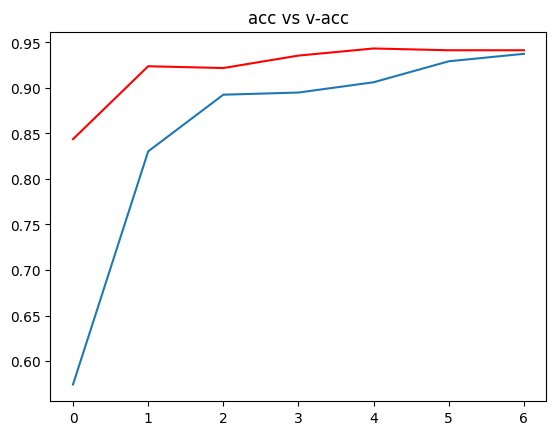

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

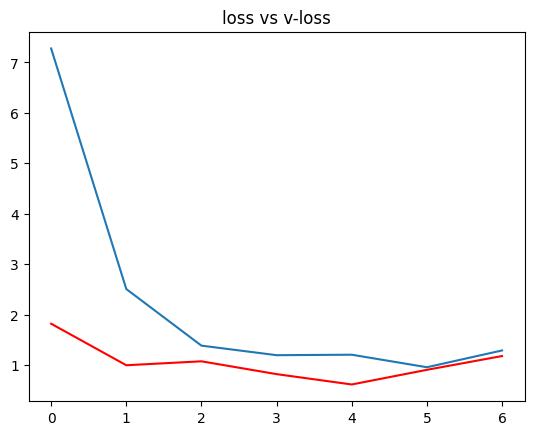

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/best_model.h5")
acc = model.evaluate_generator(val)[1]
print("The accuracy of your model is = ",acc*100," %")

<ipython-input-15-bdfb2af1f703>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of your model is =  95.0772762298584  %


In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img = load_img(path,target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im,axis=0)
  pred = np.argmax(model.predict(img))
  print(pred)
  print(f" the image belongs to {ref[pred]}")

In [ ]:
path = "/content/drive/MyDrive/Dataset/Test/Apple Scab/a7609a35-fd75-4ec3-868a-eb97b9ffd096___FREC_Scab 3032_new30degFlipLR.JPG"
prediction(path)
path1 = "/content/drive/MyDrive/Dataset/Test/Black Rot/aeddf040-51e9-439f-9d30-d7db6559508c___JR_FrgE.S 2914.JPG"
prediction(path1)
path2 = "/content/drive/MyDrive/Dataset/Test/Cedar Apple Rust/fbf3ccdb-6130-47f3-b5e3-3d2726b4b5c7___FREC_C.Rust 4237_new30degFlipLR.JPG"
prediction(path2)
path3 = "/content/drive/MyDrive/Dataset/Test/Healthy/6fe99b1c-d402-4756-a21b-ff964b999adb___RS_HL 6253.JPG"
prediction(path3)

1/1 [==============================] - 0s 34ms/step
0
 the image belongs to Apple Scab
1/1 [==============================] - 0s 96ms/step
1
 the image belongs to Black Rot
1/1 [==============================] - 0s 32ms/step
2
 the image belongs to Cedar Apple Rust
1/1 [==============================] - 0s 18ms/step
3
 the image belongs to Healthy
